In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor 
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day7/Housing.csv")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [6]:
#getting original names for columns using verbose_feature_names_out
ohc = OneHotEncoder(sparse_output = False, drop = 'first')
ct = make_column_transformer((ohc, make_column_selector(dtype_include=object)), 
                             ("passthrough", make_column_selector(dtype_include=['int64', 'float64'])), verbose_feature_names_out = False).set_output(transform='pandas')
dum_np = ct.fit_transform(df)
dum_np.head()

,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes,price,lotsize,bedrooms,bathrms,stories,garagepl
0,1.0,0.0,1.0,0.0,0.0,0.0,42000.0,5850,3,1,2,1
1,1.0,0.0,0.0,0.0,0.0,0.0,38500.0,4000,2,1,1,0
2,1.0,0.0,0.0,0.0,0.0,0.0,49500.0,3060,3,1,1,0
3,1.0,1.0,0.0,0.0,0.0,0.0,60500.0,6650,3,1,2,0
4,1.0,0.0,0.0,0.0,0.0,0.0,61000.0,6360,2,1,1,0


In [7]:
X = df.drop('price', axis=1)
X = ct.fit_transform(X)
y = df['price']

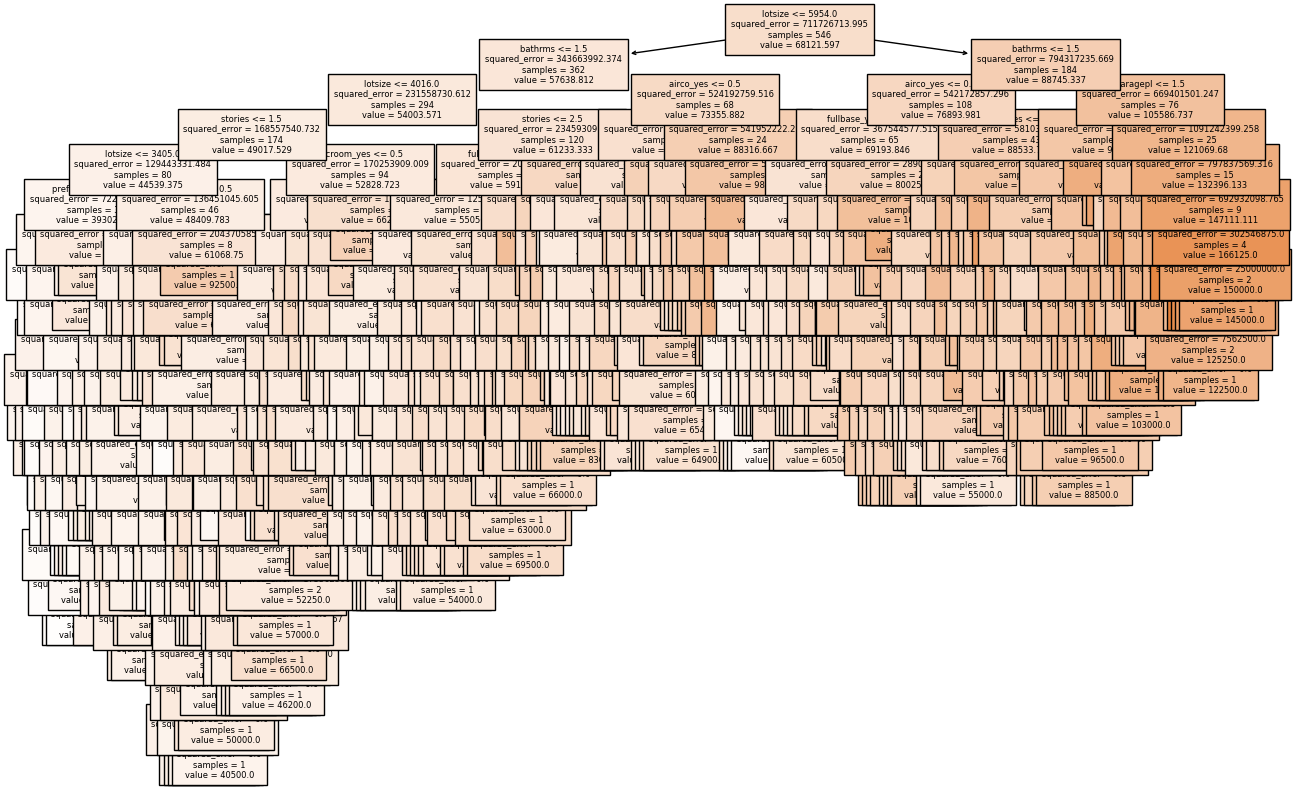

In [8]:
dtr = DecisionTreeRegressor()
dtr.fit(X, y)

#plotting tree
plt.figure(figsize=(15,10))
plot_tree(dtr,feature_names=list(X.columns),
               filled=True,fontsize=6);

In [10]:
#gridsearch to find best max_depth, min_samples_leaf, min_samples_split
kfold = KFold(n_splits = 5, shuffle = True, random_state=24)

params = {'min_samples_split' : np.arange(2, 35, 5), 'min_samples_leaf':np.arange(1, 35, 5), 'max_depth': [None, 4, 3, 2, 6, 8, 10]}
gcv = GridSearchCV(dtc, param_grid = params, cv = kfold, scoring = 'r2')
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

0.52198819387929
{'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 2}


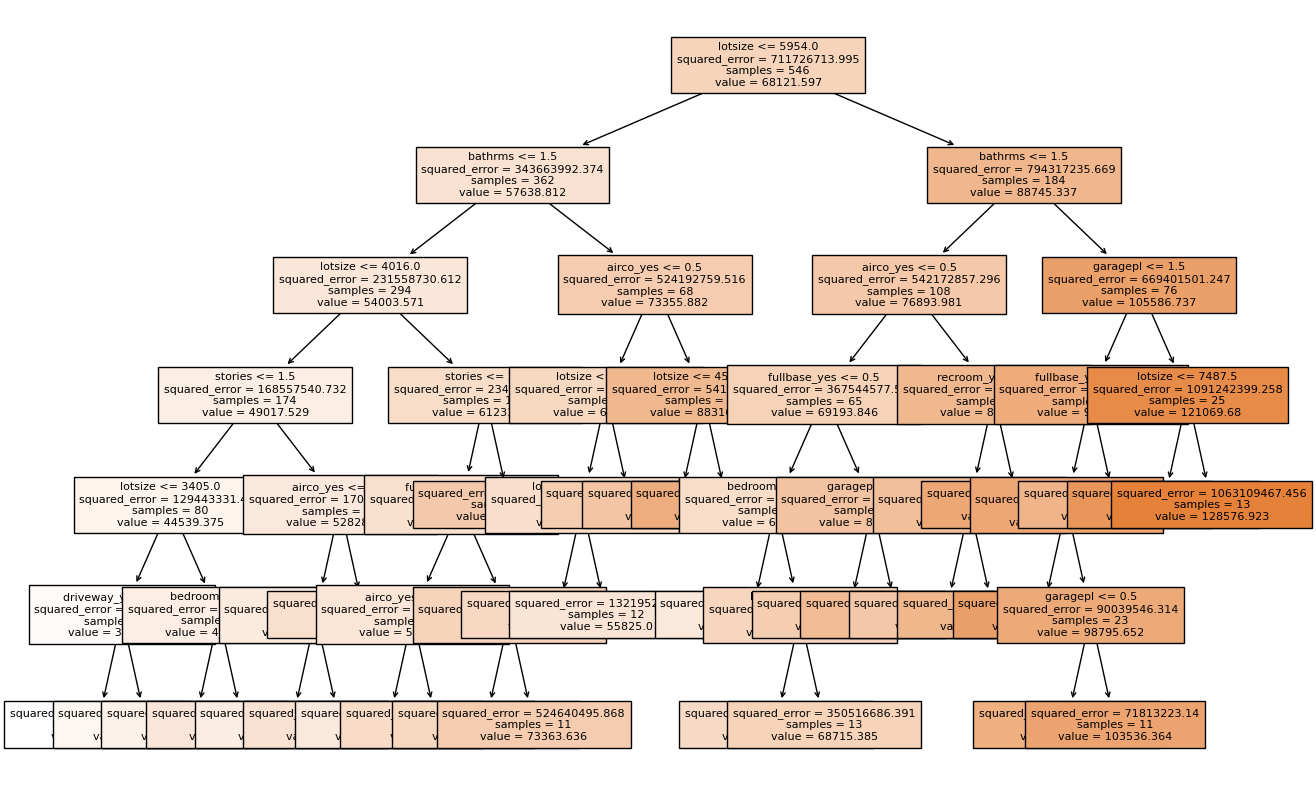

In [11]:
#plotting best tree 
best_tree = gcv.best_estimator_
plt.figure(figsize=(15,10))
plot_tree(best_tree,feature_names=list(X.columns),
               filled=True,fontsize= 8);

[0.00124451 0.01113985 0.04116423 0.         0.07963907 0.
 0.54594481 0.00854963 0.23071318 0.03241213 0.04919258]


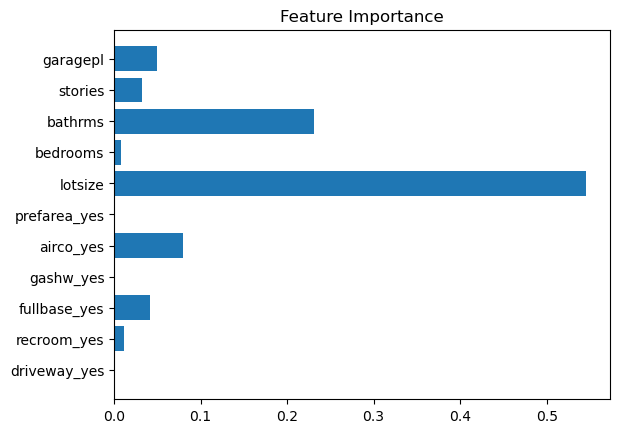

In [12]:
#feature importance
print(best_tree.feature_importances_)

df_imp = pd.DataFrame({'Feature':list(X.columns), 'Importance':best_tree.feature_importances_})

#plotting feature importance
plt.barh(df_imp['Feature'],
       df_imp['Importance'])
plt.title("Feature Importance")
#plt.xticks(rotation = 90)
plt.show()